In [168]:
import numpy as np
import pandas as pd

tran = pd.read_csv('Transactions.csv')
cust = pd.read_csv('Customer.csv')
prod = pd.read_csv('prod_cat_info.csv')

# Reference Name Info
tran.info()
cust.info()
prod.info()

# Make our own custom data frame called sales
cat_list = []
subcat_list = []
dob_list = []
gender_list = []

sales = pd.DataFrame([tran['prod_cat_code'], tran['prod_subcat_code'], tran['transaction_id'], tran['cust_id']],index=['tran.cat', 'tran.subcat', 'tran.id', 'tran.cust']).transpose()

for i in range(len(sales)):
    cat = sales['tran.cat'][i]
    sub = sales['tran.subcat'][i]
    customer = sales['tran.cust'][i]
    cat_list.append(str(prod[(prod['prod_cat_code'] == cat) & (prod['prod_sub_cat_code'] == sub)]['prod_cat'].values).strip('[]').replace("'", ""))
    subcat_list.append(str(prod[(prod['prod_cat_code'] == cat) & (prod['prod_sub_cat_code'] == sub)]['prod_subcat'].values).strip('[]').replace("'", ""))
    dob_list.append(str(cust[cust['customer_Id'] == customer]['DOB'].values).strip('[]').replace("'", ""))
    gender_list.append(str(cust[cust['customer_Id'] == customer]['Gender'].values).strip('[]').replace("'", ""))

sales['Category'] = cat_list
sales['Subcategory'] = subcat_list
sales['DOB'] = dob_list

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
transaction_id      23053 non-null int64
cust_id             23053 non-null int64
tran_date           23053 non-null object
prod_subcat_code    23053 non-null int64
prod_cat_code       23053 non-null int64
Qty                 23053 non-null int64
Rate                23053 non-null int64
Tax                 23053 non-null float64
total_amt           23053 non-null float64
Store_type          23053 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
customer_Id    5647 non-null int64
DOB            5647 non-null object
Gender         5645 non-null object
city_code      5645 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

sales['Age'] = sales['DOB'].apply(lambda x: 2020 - int(x[-4:]))
sales['Gender'] = gender_list
sales['Transactions Month/Year'] = tran['tran_date'].apply(lambda x: x[(x.find('/') if x.find('-') == -1 else x.find('-'))+1:].replace("-", "/"))
sales['Transactions Year'] = tran['tran_date'].apply(lambda x: x[(x.rfind('/') if x.rfind('-') == -1 else x.rfind('-'))+1:])

revenue_list = []
for i in range(len(tran['total_amt'])):
    revenue_list.append(tran['total_amt'][i] - tran['Tax'][i] if tran['total_amt'][i] > 0 else tran['total_amt'][i] + tran['Tax'][i])

sales['Revenue'] = revenue_list
sales['Store Type'] = tran['Store_type']

# Output to Console
print('Data Frame:')
print(sales)

Data Frame:
       tran.cat  tran.subcat      tran.id  tran.cust          Category  \
0             1            1  80712190438     270351          Clothing   
1             3            5  29258453508     270384       Electronics   
2             5            6  51750724947     273420             Books   
3             6           11  93274880719     271509  Home and kitchen   
4             5            6  51750724947     273420             Books   
...         ...          ...          ...        ...               ...   
23048         5           12  94340757522     274550             Books   
23049         1            4  89780862956     270022          Clothing   
23050         6            2  85115299378     271020  Home and kitchen   
23051         5           11  72870271171     270911             Books   
23052         5           11  77960931771     271961             Books   

      Subcategory         DOB  Age Gender Transactions Month/Year  \
0           Women  26-09-1981 



Crunching the Numbers:

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: Category, dtype: int64


Text(0.5, 1.0, 'Category')

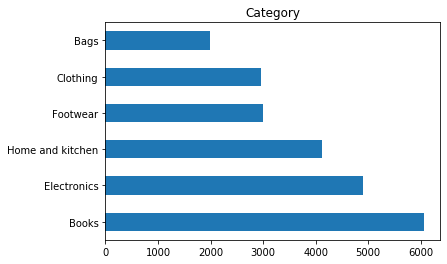

In [170]:
print('\n\nCrunching the Numbers:\n')
print(sales['Category'].value_counts())

fig = sales['Category'].value_counts().plot(kind='barh')
fig.set_title('Category')

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: Subcategory, dtype: int64


Text(0.5, 1.0, 'Subcategory')

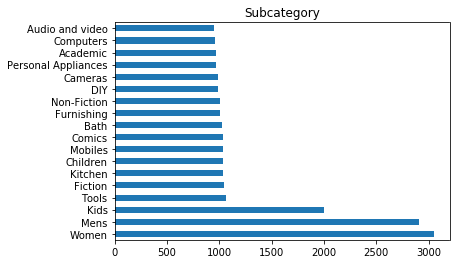

In [171]:
print(sales['Subcategory'].value_counts())

fig = sales['Subcategory'].value_counts().plot(kind='barh')
fig.set_title('Subcategory')

M      11811
F      11233
nan        9
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Gender')

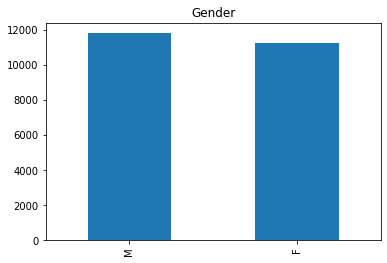

In [193]:
print(sales['Gender'].value_counts())
fig = sales['Gender'].value_counts().drop('nan').plot(kind='bar')
fig.set_title('Gender')

45    1168
33    1144
31    1135
28    1099
41    1065
40    1051
32    1031
46    1027
43    1012
49    1007
35    1006
38    1004
39     989
47     985
48     973
42     972
36     946
50     925
34     921
44     919
30     908
29     897
37     869
Name: Age, dtype: int64


Text(0.5, 1.0, 'Age')

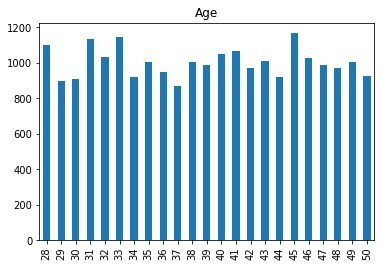

In [173]:
print(sales['Age'].value_counts())
fig = sales['Age'].value_counts().sort_index().plot(kind='bar')
fig.set_title('Age')

10/2012    673
10/2013    671
11/2012    657
10/2011    634
11/2011    634
          ... 
8/2012     227
6/2012     217
6/2011     215
02/2014    144
01/2011    141
Name: Transactions Month/Year, Length: 66, dtype: int64


Text(0.5, 1.0, 'Transactions Per Month/Year')

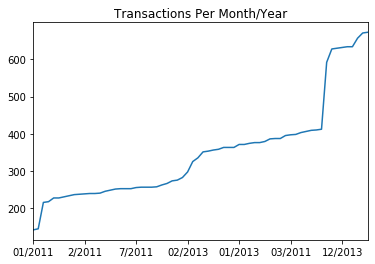

In [174]:
# An example of how we have to be careful when cleaning
#   Solution: Use a datetime object to make everything easier
print(sales['Transactions Month/Year'].value_counts())
fig = sales['Transactions Month/Year'].value_counts().sort_values().plot()
fig.set_title('Transactions Per Month/Year')

2012    7541
2013    7456
2011    6991
2014    1065
Name: Transactions Year, dtype: int64


Text(0.5, 1.0, 'Transactions Per Year')

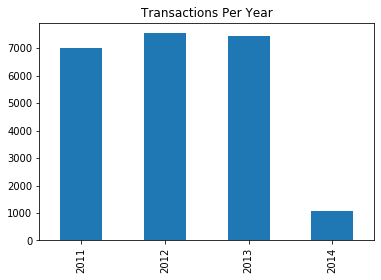

In [175]:
print(sales['Transactions Year'].value_counts())
fig = sales['Transactions Year'].value_counts().sort_index().plot(kind='bar')
fig.set_title('Transactions Per Year')

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store Type, dtype: int64


Text(0.5, 1.0, 'Store Type')

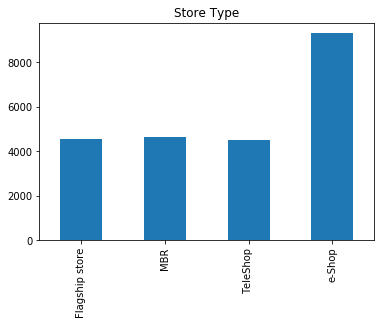

In [176]:
print(sales['Store Type'].value_counts())
fig = sales['Store Type'].value_counts().sort_index().plot(kind='bar')
fig.set_title('Store Type')

0       -3860.0
1       -7485.0
2       -1582.0
3       -4089.0
4       -1582.0
          ...  
23048    1264.0
23049     677.0
23050    4208.0
23051    3426.0
23052     447.0
Name: Revenue, Length: 23053, dtype: float64


Text(0.5, 1.0, 'Revenue')

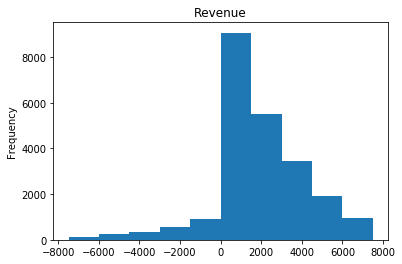

In [177]:
print(sales['Revenue'])
fig = sales['Revenue'].plot(kind='hist')
fig.set_title('Revenue')

In [178]:
print('Shopping History of the Top Five Buyers:\n')
for i in range(5):
    print('#%d:' %(i+1))
    print(sales[sales['tran.cust'] == sales['tran.cust'].value_counts().index[i]])
    print('\n\n')

Shopping History of the Top Five Buyers:

#1:
       tran.cat  tran.subcat      tran.id  tran.cust          Category  \
493           5           10  11878870074     268819             Books   
564           5           10  11878870074     268819             Books   
1333          5           10  22303224302     268819             Books   
1494          5           10  22303224302     268819             Books   
2830          5           10   9987404340     268819             Books   
4732          5           11  95368989068     268819             Books   
5261          6           12  41666150977     268819  Home and kitchen   
5847          3            5  81299333982     268819       Electronics   
10497         3            9  81541766449     268819       Electronics   
14099         1            3   8703595902     268819          Clothing   
19564         6            2  93712197376     268819  Home and kitchen   
22570         1            4  73982084066     268819          Clot